In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from Corras.Scenario.aslib_ranking_scenario import ASRankingScenario
from itertools import product

# measures
from scipy.stats import kendalltau, describe
from sklearn.metrics import mean_absolute_error, mean_squared_error
from Corras.Evaluation.evaluation import ndcg_at_k, compute_relevance_scores_unit_interval

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
scenario_path = "./aslib_data-aslib-v4.0/"
evaluations_path = "./evaluations/"

figures_path = "./figures/progression-plots/"
scenario_names = ["SAT11-RAND", "MIP-2016",
                  "CSP-2010", "SAT11-INDU", "SAT11-HAND"]
use_quadratic_transform_values = [False]
use_max_inverse_transform_values = ["max_cutoff"]
# scale_target_to_unit_interval_values = [True, False]
scale_target_to_unit_interval_values = [True]
seed = 15

params = [scenario_names, use_quadratic_transform_values,
          use_max_inverse_transform_values, scale_target_to_unit_interval_values]

param_product = list(product(*params))

       Unnamed: 0  split  seed  \
60             60      1    15   
61             61      1    15   
62             62      1    15   
63             63      1    15   
64             64      1    15   
...           ...    ...   ...   
29995       29995     10    15   
29996       29996     10    15   
29997       29997     10    15   
29998       29998     10    15   
29999       29999     10    15   

                                        problem_instance  lambda  epsilon  \
60     SAT11/random/large/unif-k3-r4.2-v10000-c42000-...     0.0      0.0   
61     SAT11/random/large/unif-k3-r4.2-v20000-c84000-...     0.0      0.0   
62     SAT11/random/large/unif-k3-r4.2-v20000-c84000-...     0.0      0.0   
63     SAT11/random/large/unif-k3-r4.2-v20000-c84000-...     0.0      0.0   
64     SAT11/random/large/unif-k3-r4.2-v2500-c10500-S...     0.0      0.0   
...                                                  ...     ...      ...   
29995  SAT11/random/medium/unif-k7-r89-v70-c6230-S13

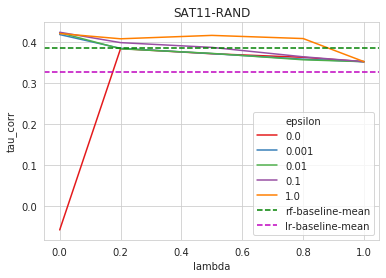

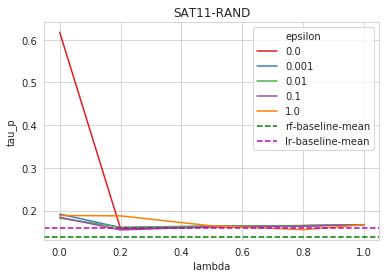

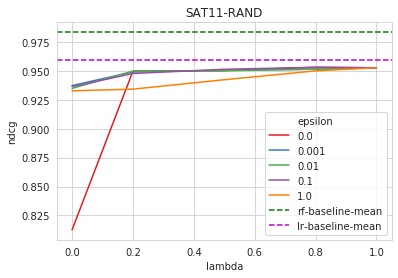

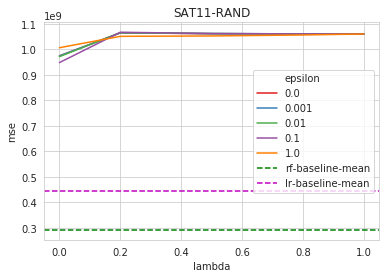

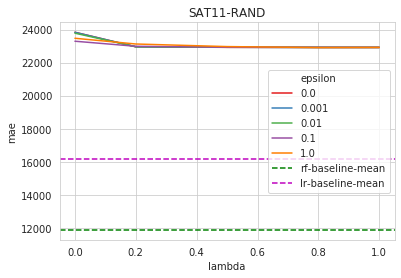

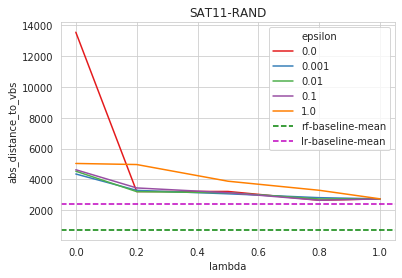

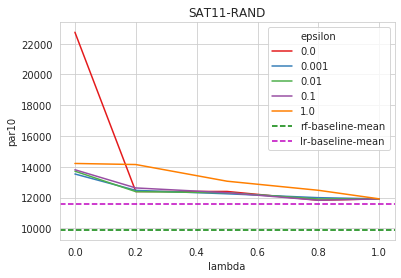

       Unnamed: 0  split  seed   problem_instance  lambda  epsilon  \
22             22      1    15             a1c1s1     0.0      0.0   
23             23      1    15              air04     0.0      0.0   
24             24      1    15    ash608gpia-3col     0.0      0.0   
25             25      1    15            danoint     0.0      0.0   
26             26      1    15             glass4     0.0      0.0   
...           ...    ...   ...                ...     ...      ...   
10895       10895     10    15            rail507     1.0      1.0   
10896       10896     10    15             rmine6     1.0      1.0   
10897       10897     10    15   rococoC11-011100     1.0      1.0   
10898       10898     10    15  satellites2-60-fs     1.0      1.0   
10899       10899     10    15           wachplan     1.0      1.0   

       quadratic_transform max_inverse_transform  scale_to_unit_interval  \
22                   False            max_cutoff                    True   
23     

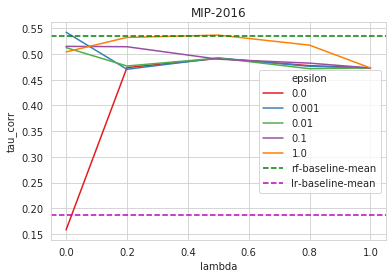

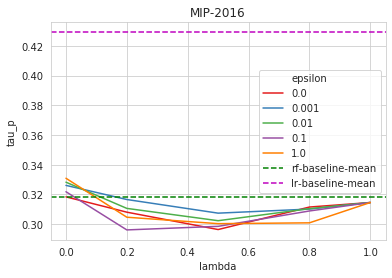

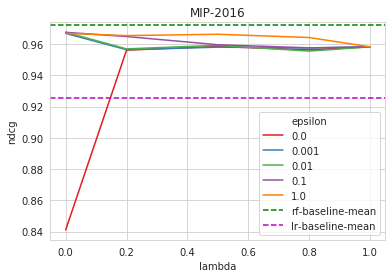

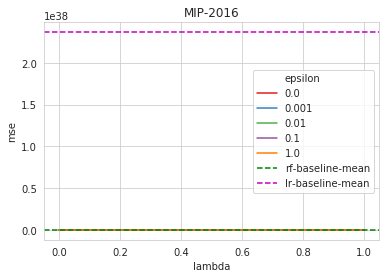

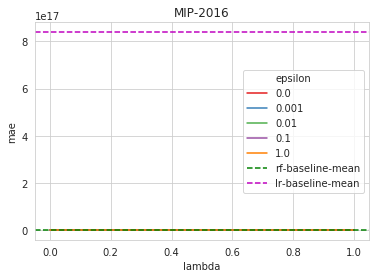

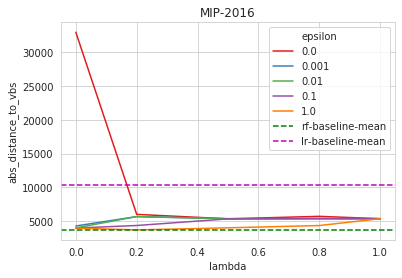

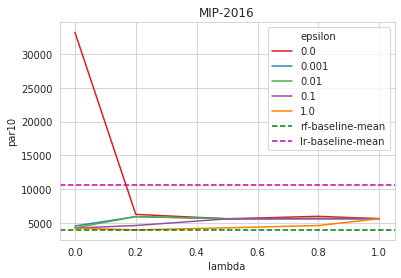

      Unnamed: 0  split  seed                              problem_instance  \
203          203      1    15         1-fullins-4-5.xml.watchless.minion.gz   
204          204      1    15      1-insertions-6-4.xml.watchless.minion.gz   
205          205      1    15      1-insertions-6-6.xml.watchless.minion.gz   
206          206      1    15         2-fullins-3-5.xml.watchless.minion.gz   
207          207      1    15      2-insertions-4-3.xml.watchless.minion.gz   
...          ...    ...   ...                                           ...   
4043        4043     10    15              series-90.xml.minion.conv.minion   
4044        4044     10    15                 socialGolfer-8-4-8.xml.minion   
4045        4045     10    15  tsp-20-68_ext.xml.minion.converted.minion.gz   
4046        4046     10    15  tsp-20-75_ext.xml.minion.converted.minion.gz   
4047        4047     10    15         will199GPIA-7.xml.watchless.minion.gz   

      lambda  epsilon  quadratic_transform max_inve

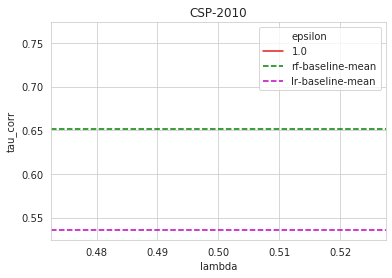

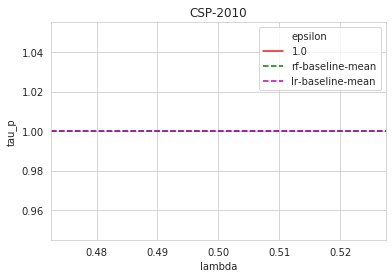

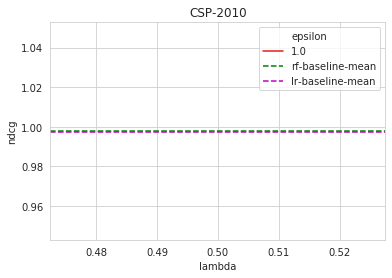

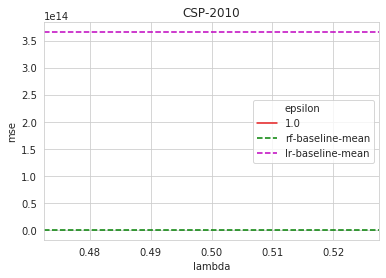

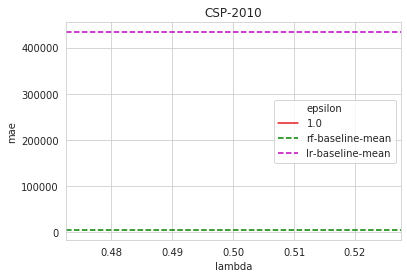

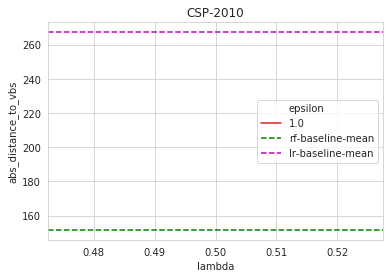

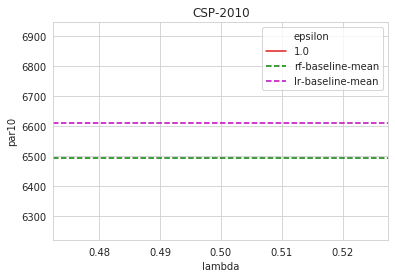

DataError: No numeric types to aggregate

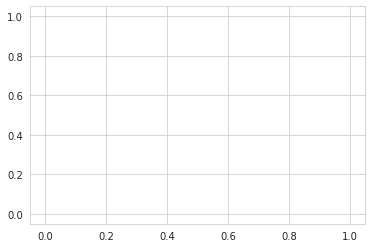

In [3]:
for scenario_name, use_quadratic_transform, use_max_inverse_transform, scale_target_to_unit_interval in param_product:
    df_baseline_rf = None
    df_baseline_lr = None
    params_string = "-".join([scenario_name,
                              str(use_quadratic_transform), str(use_max_inverse_transform), str(scale_target_to_unit_interval)])
    try:
        df_baseline_lr = pd.read_csv(
            evaluations_path + "baseline-evaluation-linear-regression" + scenario_name + ".csv")
        df_baseline_rf = pd.read_csv(
            evaluations_path + "baseline-evaluation-random_forest" + scenario_name + ".csv")    
    except:
        print("Scenario " + scenario_name +
              " not found in corras evaluation data!")

        # continue
    try:
        # df_corras = pd.read_csv(evaluations_path + "corras-linhinge-evaluation-" + scenario_name + ".csv")
        corras = pd.read_csv(
            evaluations_path + "corras-hinge-linear-" + scenario_name + "-new.csv")
    except:
        print("Scenario " + scenario_name +
              " not found in corras evaluation data!")
        continue
    current_frame = corras.loc[(corras["seed"] == seed) & (
    corras["max_inverse_transform"] == use_max_inverse_transform) & (
    corras["quadratic_transform"] == use_quadratic_transform) & (corras["scale_to_unit_interval"] == scale_target_to_unit_interval)]

    print(current_frame[:])
    for measure in current_frame.columns[9:]:
        plt.clf()
        # bp = sns.boxplot(x="lambda", y=measure, hue="epsilon", data=df_corras)
        # bp = sns.boxplot(x="lambda", y=measure, data=df_corras)
        # if df_baseline is not None:
        #     bp.axes.axhline(df_baseline[measure].mean(), c="g", ls="--", label="rf-baseline-mean")
        # plt.title(scenario_name)
        # plt.legend()
        # plt.savefig(figures_path+scenario_name+"-" + measure +"-boxplot.pdf")

    for measure in current_frame.columns[9:]:
        plt.clf()
        # bp = sns.lineplot(x="lambda", y=measure, hue="epsilon", data=df_corras, palette=sns.color_palette("Set1", len(pd.unique(df_corras["epsilon"]))))
        # g = sns.FacetGrid(df_corras, col="max_inverse_transform")
        # g.map(sns.lineplot, "lambda", measure)
        lp = sns.lineplot(x="lambda", y=measure, hue="epsilon", data=current_frame, ci=None, palette=sns.color_palette("Set1", len(pd.unique(current_frame["epsilon"]))))
        if df_baseline_rf is not None:
            lp.axes.axhline(df_baseline_rf[measure].mean(
            ), c="g", ls="--", label="rf-baseline-mean")
        if df_baseline_lr is not None:    
            lp.axes.axhline(df_baseline_lr[measure].mean(
            ), c="m", ls="--", label="lr-baseline-mean")
        plt.title(scenario_name)
        plt.legend()
        plt.savefig(figures_path + scenario_name + "-linear-hinge-" + params_string.replace(".","_") + "-" + measure + "-lineplot-eps.pdf")
        plt.show()

In [6]:
corras.head()

,Unnamed: 0,split,seed,problem_instance,lambda,epsilon,quadratic_transform,max_inverse_transform,scale_to_unit_interval,tau_corr,tau_p,ndcg,mse,mae,abs_distance_to_vbs,par10
0,0,1,15,SAT11/random/large/unif-k3-r4.2-v10000-c42000-...,0.0,0.0,True,none,True,0.358569,0.243305,0.983010,5.573759e+08,11328.986797,2.39863,8.34273
1,1,1,15,SAT11/random/large/unif-k3-r4.2-v20000-c84000-...,0.0,0.0,True,none,True,NaN,NaN,0.949316,5.360259e+08,11368.017070,1.32780,9.95149
2,2,1,15,SAT11/random/large/unif-k3-r4.2-v20000-c84000-...,0.0,0.0,True,none,True,NaN,NaN,0.784682,1.020172e+09,22227.245251,0.00000,85.36300
3,3,1,15,SAT11/random/large/unif-k3-r4.2-v20000-c84000-...,0.0,0.0,True,none,True,0.369274,0.237302,0.957807,7.981425e+08,16665.916851,48.55660,69.61740
4,4,1,15,SAT11/random/large/unif-k3-r4.2-v2500-c10500-S...,0.0,0.0,True,none,True,NaN,NaN,0.971212,5.761325e+08,12050.375897,1.86072,3.77343
